# For AROUSAL

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

In [278]:
from os import listdir
from os.path import isfile, join
mypath = "/Users/apple/Desktop/eeglab14_1_2b/Granger Casuality/img/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [279]:
onlyfiles.sort()

In [280]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np
from PIL import Image

In [281]:
X = []
for i in range(len(onlyfiles)):
    data = Image.open(mypath + onlyfiles[i])
    arr = np.array(data)
    arr = arr[:,:,0:3]
    #result = np.zeros((32,32))
    #toadd = np.zeros((32,32,4))
    #for k in range(arr.shape[2]-1):
    #    result[:arr[:,:,k].shape[0],:arr[:,:,k].shape[1]] = arr[:,:,k] 
    #    toadd[:,:,k] = result
    X.append(arr)
print(len(X))
print(X[1].shape)

1280
(32, 32, 3)


In [282]:
import pandas as pd
df = pd.read_csv('/Users/apple/Desktop/eeglab14_1_2b/participant_ratings.csv',
                sep=r'\s*,\s*',engine = 'python', na_values = '?')
df.dropna()
Y_chart = pd.get_dummies(df, drop_first=True)
Y = Y_chart['Arousal'].tolist()
print(len(Y))

1280


In [283]:
for i in range(len(Y)):
    if Y[i] < 5:
        Y[i] = 0
    else:
        Y[i] = 1
print(len(Y))

1280


In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=(40/len(Y)))

In [286]:
import numpy as np
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
print(X_train.shape)
print(y_train.shape)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_test.shape)
print(y_test.shape)

(1240, 32, 32, 3)
(1240,)
(40, 32, 32, 3)
(40,)


In [287]:
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_train.min(),
                        y_train.mean(), y_train.std(), y_train.max()))

Image dataset have shape = (1240, 32, 32, 3)
Image dataset has min/mean/std/max = 1.00/101.12/49.81/253.00

Train label has shape = (1240,)
Training label has min/mean/std/max = 0.00/0.59/0.49/1.00


In [288]:
def normalize_data(data): 
    data = data / data.max()
    return data

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_train.min(),
                        y_train.mean(), y_train.std(), y_train.max()))

Image dataset have shape = (1240, 32, 32, 3)
Image dataset has min/mean/std/max = 0.00/0.40/0.20/1.00

Train label has shape = (1240,)
Training label has min/mean/std/max = 0.00/0.59/0.49/1.00


In [289]:
def normalize_data(data): 
    for x in data:
        x = x/255
    return data

In [290]:
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
X_train_temp = np.asarray(X_train)
Y_train_temp = np.asarray(y_train)
print('Image dataset have shape =', X_train_temp.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train_temp.min(),
                        X_train_temp.mean(), X_train_temp.std(), X_train_temp.max()))
print('')
print('Train label has shape =', Y_train_temp.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train_temp.min(),
                        Y_train_temp.mean(), Y_train_temp.std(), Y_train_temp.max()))

Image dataset have shape = (1240, 32, 32, 3)
Image dataset has min/mean/std/max = 0.00/0.40/0.20/1.00

Train label has shape = (1240,)
Training label has min/mean/std/max = 0.00/0.59/0.49/1.00


In [291]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

In [292]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train])
tensor_y = torch.from_numpy(y_train)

In [293]:
trainset = utils.TensorDataset(tensor_x,tensor_y)

In [294]:
trainloader = utils.DataLoader(trainset,  batch_size= 40)

In [295]:
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test])
tensor_y_test = torch.from_numpy(y_test)

In [296]:
testset = utils.TensorDataset(tensor_x_test,tensor_y_test)
testloader = utils.DataLoader(testset,  batch_size=40)

In [297]:
device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)

cpu


In [298]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [299]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())

torch.Size([40, 32, 32, 3])
torch.Size([40, 3, 32, 32])


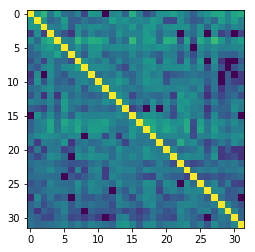

In [300]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rows = 1
columns = 1
fig=plt.figure()
for i in range(1):
    fig.add_subplot(rows, columns, i+1)
    img = images[i]
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

In [301]:
'''
kernal size 3*3
step size = 1
maximum pooled layer of 2*2
step size = 2
learning rate = 0.0001
batch size = 63
dropout rate = 0.5
k-fold: 5-fold cross validation
'''

'\nkernal size 3*3\nstep size = 1\nmaximum pooled layer of 2*2\nstep size = 2\nlearning rate = 0.0001\nbatch size = 63\ndropout rate = 0.5\nk-fold: 5-fold cross validation\n'

In [302]:
num_classes = 2
drop_out = 0.4;
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input channel = 3, output channel = 6, kernel_size = 5
        # input size = (32, 32), output size = (28, 28)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # input channel = 6, output channel = 16, kernel_size = 5
        # input size = (14, 14), output size = (10, 10)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # input dim = 16*5*5, output dim = 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # input dim = 120, output dim = 40
        self.fc2 = nn.Linear(120, 40)
        # input dim = 40, output dim = 2
        self.fc3 = nn.Linear(40, num_classes)

    def forward(self, x):
        # pool size = 2
        # input size = (28, 28), output size = (14, 14), output channel = 6
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # pool size = 2
        # input size = (10, 10), output size = (5, 5), output channel = 16
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.shape[0], -1)
        # input dim = 16*5*5, output dim = 120
        x = F.relu(self.fc1(x))
        # input dim = 120, output dim = 40
        x = F.relu(self.fc2(x))
        # input dim = 40, output dim = 2
        x = self.fc3(x)
        return x
    
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=2, bias=True)
)

In [303]:
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] 
epochs = 500 
print_freq = 20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()
        if i % print_freq == print_freq - 1:
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

[epoch: 0, i:    19] avg mini-batch loss: 0.685
[epoch: 1, i:    19] avg mini-batch loss: 0.685
[epoch: 2, i:    19] avg mini-batch loss: 0.685
[epoch: 3, i:    19] avg mini-batch loss: 0.684
[epoch: 4, i:    19] avg mini-batch loss: 0.684
[epoch: 5, i:    19] avg mini-batch loss: 0.684
[epoch: 6, i:    19] avg mini-batch loss: 0.684
[epoch: 7, i:    19] avg mini-batch loss: 0.684
[epoch: 8, i:    19] avg mini-batch loss: 0.684
[epoch: 9, i:    19] avg mini-batch loss: 0.684
[epoch: 10, i:    19] avg mini-batch loss: 0.683
[epoch: 11, i:    19] avg mini-batch loss: 0.682
[epoch: 12, i:    19] avg mini-batch loss: 0.680
[epoch: 13, i:    19] avg mini-batch loss: 0.678
[epoch: 14, i:    19] avg mini-batch loss: 0.673
[epoch: 15, i:    19] avg mini-batch loss: 0.667
[epoch: 16, i:    19] avg mini-batch loss: 0.662
[epoch: 17, i:    19] avg mini-batch loss: 0.653
[epoch: 18, i:    19] avg mini-batch loss: 0.640
[epoch: 19, i:    19] avg mini-batch loss: 0.630
[epoch: 20, i:    19] avg mini

[epoch: 167, i:    19] avg mini-batch loss: 0.020
[epoch: 168, i:    19] avg mini-batch loss: 0.059
[epoch: 169, i:    19] avg mini-batch loss: 0.029
[epoch: 170, i:    19] avg mini-batch loss: 0.013
[epoch: 171, i:    19] avg mini-batch loss: 0.010
[epoch: 172, i:    19] avg mini-batch loss: 0.004
[epoch: 173, i:    19] avg mini-batch loss: 0.007
[epoch: 174, i:    19] avg mini-batch loss: 0.006
[epoch: 175, i:    19] avg mini-batch loss: 0.003
[epoch: 176, i:    19] avg mini-batch loss: 0.004
[epoch: 177, i:    19] avg mini-batch loss: 0.004
[epoch: 178, i:    19] avg mini-batch loss: 0.002
[epoch: 179, i:    19] avg mini-batch loss: 0.001
[epoch: 180, i:    19] avg mini-batch loss: 0.000
[epoch: 181, i:    19] avg mini-batch loss: 0.000
[epoch: 182, i:    19] avg mini-batch loss: 0.000
[epoch: 183, i:    19] avg mini-batch loss: 0.000
[epoch: 184, i:    19] avg mini-batch loss: 0.000
[epoch: 185, i:    19] avg mini-batch loss: 0.000
[epoch: 186, i:    19] avg mini-batch loss: 0.000


[epoch: 331, i:    19] avg mini-batch loss: 0.000
[epoch: 332, i:    19] avg mini-batch loss: 0.000
[epoch: 333, i:    19] avg mini-batch loss: 0.000
[epoch: 334, i:    19] avg mini-batch loss: 0.000
[epoch: 335, i:    19] avg mini-batch loss: 0.000
[epoch: 336, i:    19] avg mini-batch loss: 0.000
[epoch: 337, i:    19] avg mini-batch loss: 0.000
[epoch: 338, i:    19] avg mini-batch loss: 0.000
[epoch: 339, i:    19] avg mini-batch loss: 0.000
[epoch: 340, i:    19] avg mini-batch loss: 0.000
[epoch: 341, i:    19] avg mini-batch loss: 0.000
[epoch: 342, i:    19] avg mini-batch loss: 0.000
[epoch: 343, i:    19] avg mini-batch loss: 0.000
[epoch: 344, i:    19] avg mini-batch loss: 0.000
[epoch: 345, i:    19] avg mini-batch loss: 0.000
[epoch: 346, i:    19] avg mini-batch loss: 0.000
[epoch: 347, i:    19] avg mini-batch loss: 0.000
[epoch: 348, i:    19] avg mini-batch loss: 0.000
[epoch: 349, i:    19] avg mini-batch loss: 0.000
[epoch: 350, i:    19] avg mini-batch loss: 0.000


KeyboardInterrupt: 

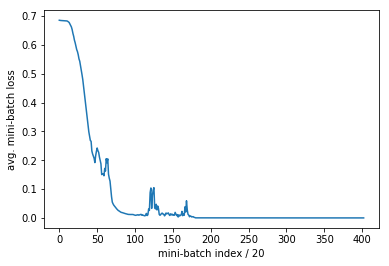

In [304]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [305]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the 40 test images: %d %%' % (100 * correct / total))
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        one = torch.tensor(1, dtype=torch.float, device=device)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(40):
            label = labels[i]
            labels = torch.tensor(labels, dtype=torch.long, device=device)
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

40
Accuracy of the network on the 40 test images: 62 %


In [308]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the 1240 training images: %d %%' % (100 * correct / total))
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        one = torch.tensor(1, dtype=torch.float, device=device)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(40):
            label = labels[i]
            labels = torch.tensor(labels, dtype=torch.long, device=device)
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

1240
Accuracy of the network on the 1240 training images: 100 %
Accuracy of Positive : 100 %
Accuracy of Negative : 100 %


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [37]:
'''
kernal size 3*3
step size = 1
maximum pooled layer of 2*2
step size = 2
learning rate = 0.0001
batch size = 63
dropout rate = 0.5
k-fold: 5-fold cross validation
'''

'\nkernal size 3*3\nstep size = 1\nmaximum pooled layer of 2*2\nstep size = 2\nlearning rate = 0.0001\nbatch size = 63\ndropout rate = 0.5\nk-fold: 5-fold cross validation\n'